In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [3]:
AAV2_WT="MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLVLPGYKYLGPFNGLD\
KGEPVNEADAAALEHDKAYDRQLDSGDNPYLKYNHADAEFQERLKEDTSFGGNLGRAVFQ\
AKKRVLEPLGLVEEPVKTAPGKKRPVEHSPVEPDSSSGTGKAGQQPARKRLNFGQTGDAD\
SVPDPQPLGQPPAAPSGLGTNTMATGSGAPMADNNEGADGVGNSSGNWHCDSTWMGDRVI\
TTSTRTWALPTYNNHLYKQISSQSGASNDNHYFGYSTPWGYFDFNRFHCHFSPRDWQRLI\
NNNWGFRPKRLNFKLFNIQVKEVTQNDGTTTIANNLTSTVQVFTDSEYQLPYVLGSAHQG\
CLPPFPADVFMVPQYGYLTLNNGSQAVGRSSFYCLEYFPSQMLRTGNNFTFSYTFEDVPF\
HSSYAHSQSLDRLMNPLIDQYLYYLSRTNTPSGTTTQSRLQFSQAGASDIRDQSRNWLPG\
PCYRQQRVSKTSADNNNSEYSWTGATKYHLNGRDSLVNPGPAMASHKDDEEKFFPQSGVL\
IFGKQGSEKTNVDIEKVMITDEEEIRTTNPVATEQYGSVSTNLQRGNRQAATADVNTQGV\
LPGMVWQDRDVYLQGPIWAKIPHTDGHFHPSPLMGGFGLKHPPPQILIKNTPVPANPSTT\
FSAAKFASFITQYSTGQVSVEIEWELQKENSKRWNPEIQYTSNYNKSVNVDFTVDTNGVY\
SEPRPIGTRYLTRNL"

In [4]:
with open('../data/AAV_Additive_landscapes/AAV2_single_subs.json','r') as infile:
    dataj=json.load(infile)

In [5]:
phenotypes=['log2_lung_v_wt','log2_packaging_v_wt','log2_liver_v_wt',\
            'log2_kidney_v_wt','log2_spleen_v_wt','log2_heart_v_wt', 'log2_blood_v_wt']

In [6]:
len(AAV2_WT)

735

In [10]:
phenotypes=["heart","lung","kidney","liver","blood","spleen"]
noise=[0,0.01,0.1]
start_ends=[(560,588),(450,540),(450,735),(0,735)]
output_dict={}
for se in start_ends:        
    for n in noise:
        for phenotype in phenotypes:
            key=f'{phenotype}:{se[0]}:{se[1]}:{n}'
            output_dict[key]={'phenotype':phenotype, 'start':se[0],'end':se[1],'noise':n}
        

{'heart:560:588:0': {'phenotype': 'heart',
  'start': 560,
  'end': 588,
  'noise': 0},
 'lung:560:588:0': {'phenotype': 'lung', 'start': 560, 'end': 588, 'noise': 0},
 'kidney:560:588:0': {'phenotype': 'kidney',
  'start': 560,
  'end': 588,
  'noise': 0},
 'liver:560:588:0': {'phenotype': 'liver',
  'start': 560,
  'end': 588,
  'noise': 0},
 'blood:560:588:0': {'phenotype': 'blood',
  'start': 560,
  'end': 588,
  'noise': 0},
 'spleen:560:588:0': {'phenotype': 'spleen',
  'start': 560,
  'end': 588,
  'noise': 0},
 'heart:560:588:0.01': {'phenotype': 'heart',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'lung:560:588:0.01': {'phenotype': 'lung',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'kidney:560:588:0.01': {'phenotype': 'kidney',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'liver:560:588:0.01': {'phenotype': 'liver',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'blood:560:588:0.01': {'phenotype': 'blood',
  'start': 560,
  'end': 588,
  'noise': 0.01},
 'sple

In [11]:
with open('../data/AAV_Additive_landscapes/landscapes.json', 'w') as outfile:
    json.dump(output_dict, outfile,indent=4)

In [94]:
import sys

sys.path.append('../')


            

In [340]:
from models.Ground_truth_oracles.Additive_models import Additive_landscape_AAV

In [496]:
st=450
end=750

In [497]:
landscape1=Additive_landscape_AAV('../data/AAV_Additive_landscapes/AAV2_single_subs.json','liver',0,1, start=st, end=end)

In [498]:
landscape1.top_seq

'PAGTTVTPMNWFSQPGCIHLKNQGKQWMPGPIQRQNRVSKCAMDNHQMEYSWTGACKYHLNGRDSIISPGIPMTHSQDDEEIFFPQSGVLHFGEMDTTMDNADCETVQICCEMEIVQTNCVSTEPWGEVASNIQRGNRQPQTEDVNAIGVIPGMVWMDRDVYLAGPIWARIPQVAGYCKPSPLAGGFGCCDPPYVIFIKNTSVPANPHLWFFDSYMKQWITQYSTGCITVCVTWECLKENSKRWNPFVQFTNNYYKSWWVDFTVDHNGMYAEPRPIGTRWLTRPI'

In [499]:
landscape1.get_fitness(landscape1.top_seq)

1.0

In [500]:
landscape1.top_seq

'PAGTTVTPMNWFSQPGCIHLKNQGKQWMPGPIQRQNRVSKCAMDNHQMEYSWTGACKYHLNGRDSIISPGIPMTHSQDDEEIFFPQSGVLHFGEMDTTMDNADCETVQICCEMEIVQTNCVSTEPWGEVASNIQRGNRQPQTEDVNAIGVIPGMVWMDRDVYLAGPIWARIPQVAGYCKPSPLAGGFGCCDPPYVIFIKNTSVPANPHLWFFDSYMKQWITQYSTGCITVCVTWECLKENSKRWNPFVQFTNNYYKSWWVDFTVDHNGMYAEPRPIGTRWLTRPI'

In [501]:
landscape1.max_possible

60.56711578885409

In [502]:
landscape1._get_raw_fitness(landscape1.top_seq)

121.13423157770818

In [503]:
from utils.sequence_utils import *

In [504]:
mutants=list(set([generate_random_mutant(landscape1.top_seq,0.005, alphabet=AAS) for i in range(10000)]))

In [505]:
landscape1.get_fitness(mutants[5])

0

In [506]:
fitnesses=[]
distances=[]
for m in mutants:
   fitnesses.append(landscape1.get_fitness(m))
   distances.append(editdistance.eval(landscape1.top_seq, m))

In [507]:
len(fitnesses)

6511

(array([3.093e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 7.000e+01, 6.940e+02, 2.651e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

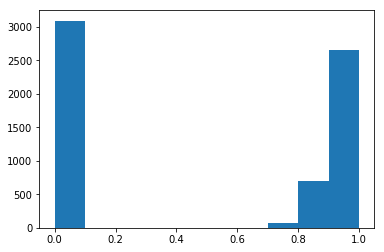

In [508]:
plt.hist(fitnesses)

(array([1.000e+00, 2.524e+03, 2.394e+03, 0.000e+00, 1.101e+03, 3.770e+02,
        0.000e+00, 8.000e+01, 2.900e+01, 5.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

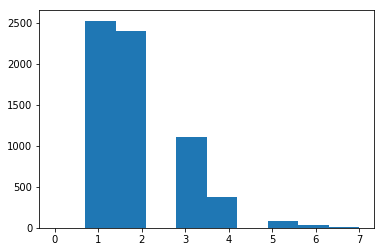

In [509]:
plt.hist(distances)

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


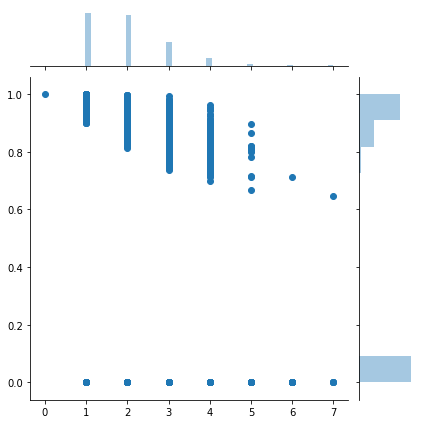

In [510]:
sns.jointplot(distances,fitnesses)

In [511]:
from explorers.elitist_explorers import Greedy
from explorers.evolutionary_explorers import WF, ML_WF
from explorers.base_explorer import Random_explorer

In [512]:
greedy_exp= Greedy(recomb_rate=0.2, threshold=0.2, mu=1, virtual_screen=20,alphabet=AAS, path='../simulations/')


In [513]:
random_exp = Random_explorer(mu=0.01,path='../simulations/')

In [514]:
start_seq=AAV2_WT[st:end]


In [515]:
from models.Noisy_models.Noisy_abstract_model import Noisy_abstract_model

noisy_landscape = Noisy_abstract_model(landscape1,signal_strength=1)

noisy_landscape.reset([start_seq])
random_exp.set_model(noisy_landscape)
random_exp.run(10,overwrite=False) 


round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 100, top: 0.5072529983392513
round: 2, cost: 201, evals: 200, top: 0.5072529983392513
round: 3, cost: 301, evals: 300, top: 0.5072529983392513
round: 4, cost: 401, evals: 400, top: 0.5072529983392513
round: 5, cost: 501, evals: 500, top: 0.5072529983392513
round: 6, cost: 601, evals: 600, top: 0.5072529983392513
round: 7, cost: 701, evals: 700, top: 0.5072529983392513
round: 8, cost: 801, evals: 800, top: 0.5072529983392513
round: 9, cost: 901, evals: 900, top: 0.5072529983392513


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


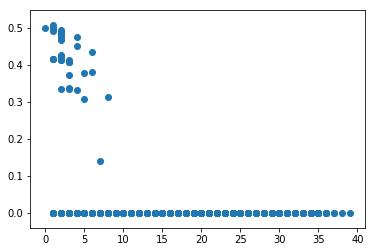

In [516]:
fitnesses=[]
distances=[]
for seq in noisy_landscape.measured_sequences:
    fitnesses.append(noisy_landscape.measured_sequences[seq])
    distances.append(editdistance.eval(AAV2_WT[st:end],seq))
plt.scatter(distances,fitnesses)

In [522]:

noisy_landscape = Noisy_abstract_model(landscape1,signal_strength=0.9)

noisy_landscape.reset([start_seq])
greedy_exp.set_model(noisy_landscape)
greedy_exp.run(30,overwrite=False) 

round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2048, top: 0.5036122402586988
round: 2, cost: 201, evals: 4515, top: 0.5081386111012771
round: 3, cost: 301, evals: 7109, top: 0.5146777359037529
round: 4, cost: 401, evals: 9915, top: 0.5158981024329686
round: 5, cost: 501, evals: 12805, top: 0.5158981024329686
round: 6, cost: 601, evals: 15680, top: 0.5158981024329686
round: 7, cost: 701, evals: 18559, top: 0.5158981024329686
round: 8, cost: 801, evals: 21396, top: 0.5158981024329686
round: 9, cost: 901, evals: 24239, top: 0.5158981024329686
round: 10, cost: 1001, evals: 27133, top: 0.5158981024329686
round: 11, cost: 1101, evals: 29924, top: 0.5158981024329686
round: 12, cost: 1201, evals: 32703, top: 0.5158981024329686
round: 13, cost: 1301, evals: 35468, top: 0.5158981024329686
round: 14, cost: 1401, evals: 38250, top: 0.5158981024329686
round: 15, cost: 1501, evals: 41033, top: 0.5158981024329686
round: 16, cost: 1601, evals: 43765, top: 0.5158981024329686
round: 1

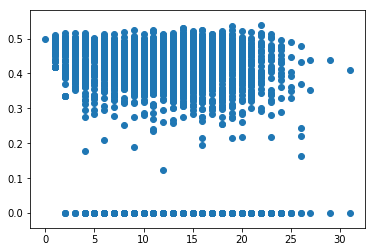

In [523]:
fitnesses=[]
distances=[]
for seq in noisy_landscape.measured_sequences:
    fitnesses.append(noisy_landscape.measured_sequences[seq])
    distances.append(editdistance.eval(AAV2_WT[st:end],seq))
plt.scatter(distances,fitnesses)

In [519]:
nnlandscapes = []
from utils.model_architectures import SKLinear,SKRF, NLNN, CNNa, Linear
from models.Noisy_models.Neural_network_models import NN_model

for arch in [SKLinear, Linear, SKRF, NLNN, CNNa]:
    nn_model = arch(len(start_seq), alphabet = greedy_exp.alphabet)
    nnlandscape = NN_model(landscape1,nn_model)
    print(nn_model.architecture_name)
    nnlandscape.update_model([start_seq])

    greedy_exp.set_model(nnlandscape)
    greedy_exp.run(10,overwrite=False) 

SKLinear
round: 0, cost: 1, evals: 0, top: 0.5


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


round: 1, cost: 101, evals: 2018, top: 0.5079579080588105
round: 2, cost: 201, evals: 4426, top: 0.5079579080588105
round: 3, cost: 301, evals: 7056, top: 0.5168927220817608
round: 4, cost: 401, evals: 9887, top: 0.5168927220817608
round: 5, cost: 501, evals: 12810, top: 0.5168927220817608
round: 6, cost: 601, evals: 15817, top: 0.5168927220817608
round: 7, cost: 701, evals: 18716, top: 0.5168927220817608
round: 8, cost: 801, evals: 21590, top: 0.5168927220817608
round: 9, cost: 901, evals: 24505, top: 0.5168927220817608
LNN
round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2049, top: 0.5062539140127836
round: 2, cost: 201, evals: 4368, top: 0.5062539140127836
round: 3, cost: 301, evals: 7004, top: 0.5062539140127836
round: 4, cost: 401, evals: 9685, top: 0.5062539140127836
round: 5, cost: 501, evals: 12388, top: 0.5062539140127836
round: 6, cost: 601, evals: 15071, top: 0.5062539140127836
round: 7, cost: 701, evals: 17801, top: 0.5062539140127836
round: 8, cost: 801, e

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


round: 1, cost: 101, evals: 2024, top: 0.5151165420705299
round: 2, cost: 201, evals: 4492, top: 0.5151165420705299
round: 3, cost: 301, evals: 7272, top: 0.5151165420705299
round: 4, cost: 401, evals: 9983, top: 0.5151165420705299
round: 5, cost: 501, evals: 12604, top: 0.5151165420705299
round: 6, cost: 601, evals: 15263, top: 0.5151165420705299
round: 7, cost: 701, evals: 17900, top: 0.5151165420705299
round: 8, cost: 801, evals: 20564, top: 0.521151840234825
round: 9, cost: 901, evals: 23369, top: 0.521151840234825
NLNN_hd50


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2012, top: 0.5069215012837934
round: 2, cost: 201, evals: 4325, top: 0.5069215012837934
round: 3, cost: 301, evals: 6915, top: 0.5069215012837934
round: 4, cost: 401, evals: 9640, top: 0.5069215012837934
round: 5, cost: 501, evals: 12350, top: 0.5069215012837934
round: 6, cost: 601, evals: 15052, top: 0.5069215012837934
round: 7, cost: 701, evals: 17833, top: 0.5069215012837934
round: 8, cost: 801, evals: 20492, top: 0.5069215012837934
round: 9, cost: 901, evals: 23229, top: 0.5069215012837934
CNNa_hd100_f50
round: 0, cost: 1, evals: 0, top: 0.5
round: 1, cost: 101, evals: 2036, top: 0.5029268284542584
round: 2, cost: 201, evals: 4286, top: 0.5029268284542584
round: 3, cost: 301, evals: 6836, top: 0.5029268284542584
round: 4, cost: 401, evals: 9524, top: 0.5029268284542584
round: 5, cost: 501, evals: 12186, top: 0.5029268284542584
round: 6, cost: 601, evals: 14954, top: 0.5029268284542584
round: 7, cost: 701, evals: 1771

In [520]:
fitnesses=[]
distances=[]
for seq in nnlandscape.measured_sequences:
    fitnesses.append(nnlandscape.measured_sequences[seq])
    distances.append(editdistance.eval(AAV2_WT[st:end],seq))

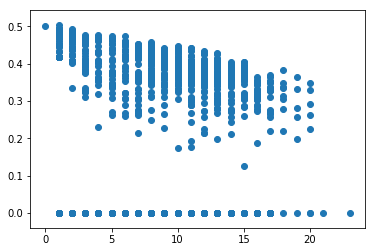

In [521]:
plt.scatter(distances,fitnesses)